# Mushroom Classification Project

Maria Ciko, Leora Mouli

BIOL 610-01


In [170]:
import os

%matplotlib inline
import string
import sys
from collections import deque

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # 3D scatter plot

sys.path.append("code/.")

from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
    learning_curve
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [97]:
df = pd.read_csv('secondary_data.csv', sep=';')
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [98]:
df = df.fillna(0) # fill missing values with 0
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,0,w,16.95,...,s,y,w,u,w,t,g,0,d,w
1,p,16.60,x,g,o,f,e,0,w,17.99,...,s,y,w,u,w,t,g,0,d,u
2,p,14.07,x,g,o,f,e,0,w,17.80,...,s,y,w,u,w,t,g,0,d,w
3,p,14.17,f,h,e,f,e,0,w,15.77,...,s,y,w,u,w,t,p,0,d,w
4,p,14.64,x,h,o,f,e,0,w,16.53,...,s,y,w,u,w,t,p,0,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,0,0,y,0,0,f,f,0,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,0,0,y,0,0,f,f,0,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,0,0,y,0,0,f,f,0,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,0,0,y,0,0,f,f,0,d,u


### EDA
Check for imbalance in the dataset

In [99]:
print(df['class'].value_counts())

class
p    33888
e    27181
Name: count, dtype: int64


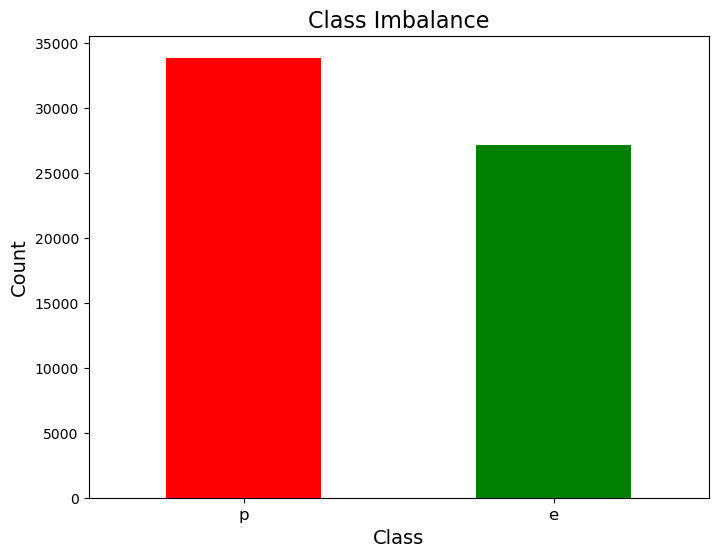

In [100]:
plt.figure(figsize=(8, 6))
df['class'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Class Imbalance', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.show()

In [101]:
# split the data
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


### Data preprocessing

In [102]:
numeric_features = ['cap-diameter','stem-height','stem-width']

categorical_features = ['cap-shape', 'cap-surface', 'cap-color',
                        'does-bruise-or-bleed', 'gill-attachment',
                        'gill-spacing','gill-color','stem-root','stem-surface',
                        'stem-color','veil-type','veil-color','has-ring',
                        'ring-type','spore-print-color', 'habitat', 'season']


In [103]:
print(X_train.dtypes)

cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object


In [104]:
# Convert categorical features to string type
X_train[categorical_features] = X_train[categorical_features].astype(str)
X_test[categorical_features] = X_test[categorical_features].astype(str)

# Convert numeric features to a numeric type if not already 
X_train[numeric_features] = X_train[numeric_features].apply(pd.to_numeric, errors='coerce')
X_test[numeric_features] = X_test[numeric_features].apply(pd.to_numeric, errors='coerce')


In [105]:
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False))

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features))

In [106]:
preprocessor.fit(X_train)
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='missing', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))])}

### Model training

In [107]:
results = {} # store the results of different models
scoring_metric = "accuracy"

In [108]:
# This function is from here: https://github.com/UBC-CS/cpsc330-2022W1/blob/master/hw/hw3/hw3.ipynb
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series width mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

### Baseline Decision Tree Classifier

In [109]:
tree_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123))
tree_pipeline.fit(X_train, y_train)

results["Decision tree"] = cross_validate(
    tree_pipeline, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
#print(pd.DataFrame(results).T)
tree_scores = cross_validate(tree_pipeline, X_train, y_train, return_train_score=True)
pd.DataFrame(tree_scores)

,fit_time,score_time,test_score,train_score
0,0.345135,0.026706,0.998670,1.0
1,0.345584,0.027753,0.997851,1.0
2,0.367985,0.029207,0.999079,1.0
3,0.358932,0.027715,0.998567,1.0
4,0.355262,0.026514,0.998977,1.0


In [110]:
y_pred = tree_pipeline.predict(X_test)
report = classification_report(y_test, y_pred, target_names=["Poisonous", "Edible"])
print(report)

              precision    recall  f1-score   support

   Poisonous       1.00      1.00      1.00      5469
      Edible       1.00      1.00      1.00      6745

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



Depth of the Decision Tree: 25


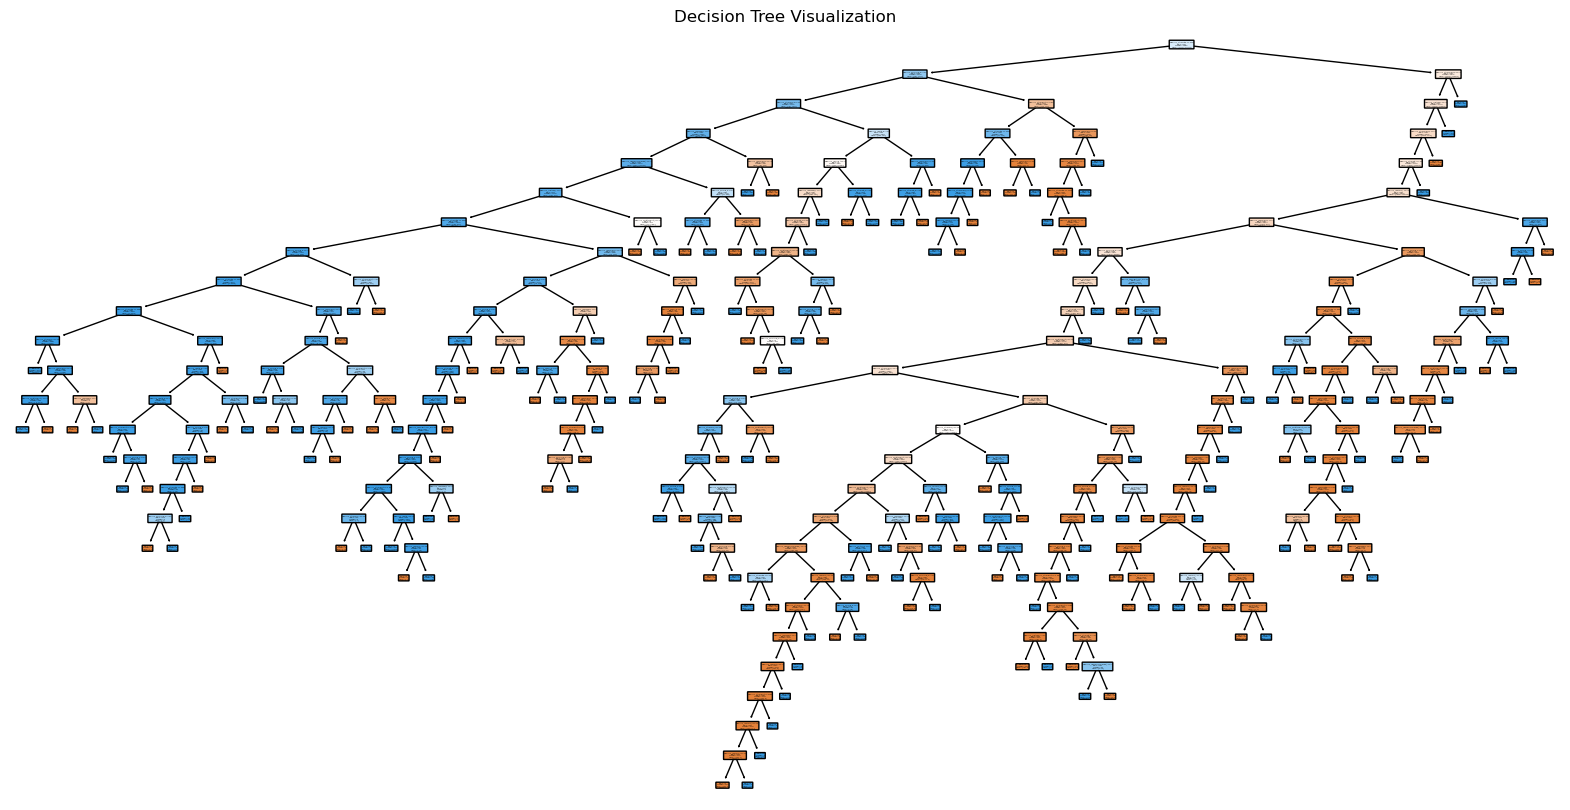

In [111]:
tree_depth = tree_pipeline.named_steps["decisiontreeclassifier"].get_depth()
print(f"Depth of the Decision Tree: {tree_depth}")

# Extract the decision tree model from the pipeline
decision_tree = tree_pipeline.named_steps["decisiontreeclassifier"]

# Visualize the tree
plt.figure(figsize=(20, 10))  # Adjust size for better readability
plot_tree(
    decision_tree,
    feature_names=preprocessor.get_feature_names_out(),  # Extract feature names from the preprocessor
    class_names=decision_tree.classes_,  # Show class labels
    filled=True,  # Add color to distinguish nodes
    rounded=True,  # Rounded edges for readability
)
plt.title("Decision Tree Visualization")
plt.show()


The decision tree is clearly overfitting so let's see if a lower depth model performs better.

In [112]:
new_tree_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=5, random_state=123))
new_tree_pipeline.fit(X_train, y_train)

results["New tree"] = cross_validate(
    new_tree_pipeline, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
new_tree_scores = cross_validate(new_tree_pipeline, X_train, y_train, return_train_score=True)
pd.DataFrame(new_tree_scores)

,fit_time,score_time,test_score,train_score
0,0.223199,0.026881,0.726128,0.729352
1,0.223793,0.026729,0.726231,0.729147
2,0.225082,0.026967,0.737079,0.734495
3,0.225883,0.027311,0.724491,0.732141
4,0.224436,0.027054,0.731348,0.727766


Depth of the New Tree: 5


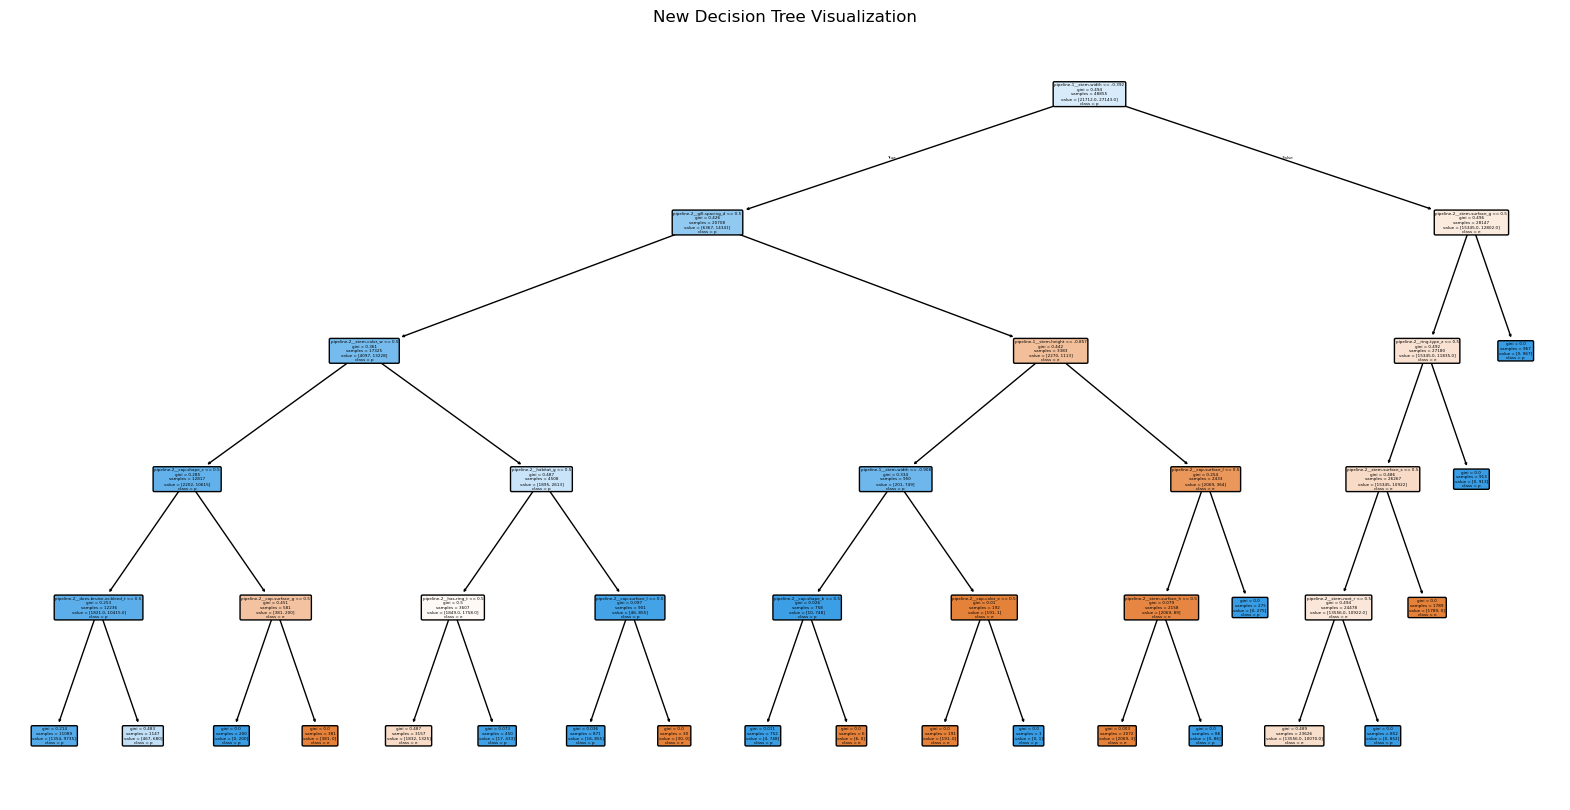

In [113]:
new_tree_depth = new_tree_pipeline.named_steps["decisiontreeclassifier"].get_depth()
print(f"Depth of the New Tree: {new_tree_depth}")

# Extract the decision tree model from the pipeline
new_tree = new_tree_pipeline.named_steps["decisiontreeclassifier"]

# Visualize the tree
plt.figure(figsize=(20, 10))  # Adjust size for better readability
plot_tree(
    new_tree,
    feature_names=preprocessor.get_feature_names_out(),  # Extract feature names from the preprocessor
    class_names=new_tree.classes_,  # Show class labels
    filled=True,  # Add color to distinguish nodes
    rounded=True,  # Rounded edges for readability
)
plt.title("New Decision Tree Visualization")
plt.show()

In [114]:
y_pred = new_tree_pipeline.predict(X_test)
report = classification_report(y_test, y_pred, target_names=["Poisonous", "Edible"])
print(report)

              precision    recall  f1-score   support

   Poisonous       0.64      0.91      0.75      5469
      Edible       0.89      0.59      0.71      6745

    accuracy                           0.73     12214
   macro avg       0.77      0.75      0.73     12214
weighted avg       0.78      0.73      0.73     12214



### Logistic Regression

In [115]:
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(max_iter=10000))
])

In [116]:
logreg_scores = cross_validate(logreg_pipeline, X_train, y_train, return_train_score=True)
pd.DataFrame(logreg_scores)

,fit_time,score_time,test_score,train_score
0,0.427557,0.028227,0.867772,0.864778
1,0.455916,0.052123,0.860915,0.863192
2,0.438045,0.027100,0.864497,0.863601
3,0.425820,0.027937,0.862450,0.864702
4,0.391408,0.026480,0.859175,0.864471


The test scores match the training scores better, so that's good -- it means the logistic regression model is learning.

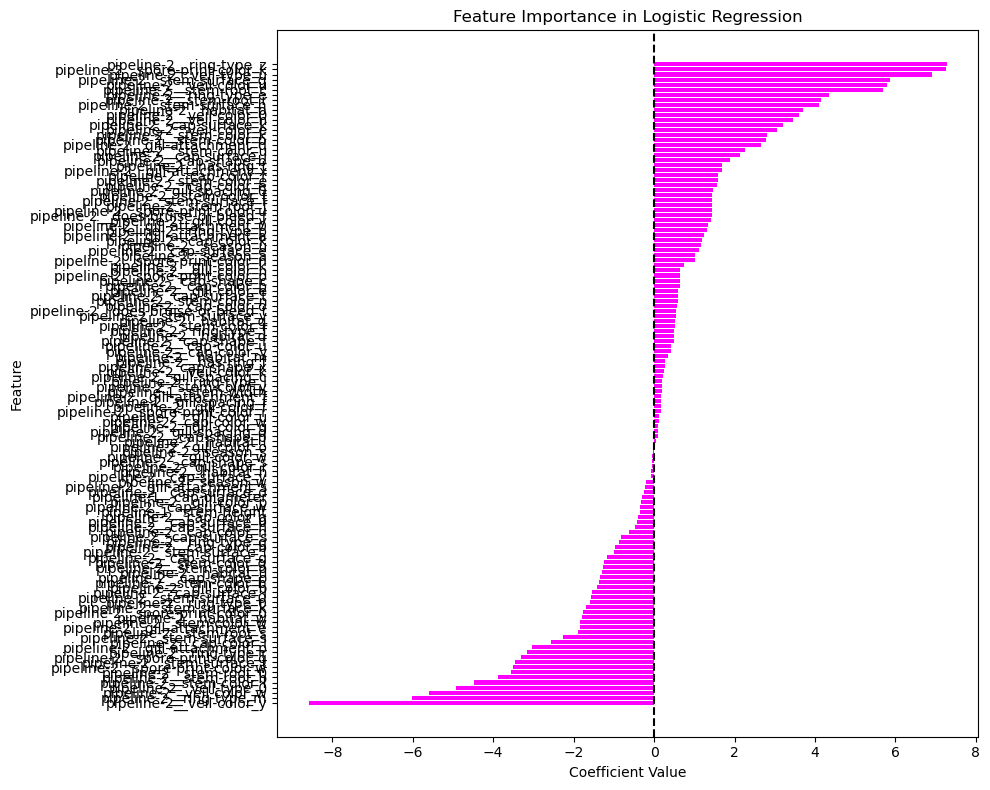

In [117]:
# Fit the pipeline
logreg_pipeline = make_pipeline(preprocessor, LogisticRegression(random_state=123, max_iter=1000))
logreg_pipeline.fit(X_train, y_train)

# Extract the logistic regression model from the pipeline
logreg_model = logreg_pipeline.named_steps["logisticregression"]

# Get feature names and coefficients
feature_names = preprocessor.get_feature_names_out()
coefficients = logreg_model.coef_[0]  # Coefficients for the first class (binary classification)

# Sort features by importance
sorted_idx = np.argsort(coefficients)
sorted_features = feature_names[sorted_idx]
sorted_coefficients = coefficients[sorted_idx]

# Visualize the coefficients
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_coefficients, color="magenta")
plt.axvline(0, color="black", linestyle="--")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.tight_layout()
plt.show()


In [176]:
y_pred = logreg_pipeline.predict(X_test)
report = classification_report(y_test, y_pred, target_names=["Poisonous", "Edible"])
print("Logistic Regression \n", report)

Logistic Regression 
               precision    recall  f1-score   support

   Poisonous       0.84      0.86      0.85      5469
      Edible       0.88      0.87      0.88      6745

    accuracy                           0.86     12214
   macro avg       0.86      0.86      0.86     12214
weighted avg       0.86      0.86      0.86     12214



In [119]:
len(preprocessor.get_feature_names_out())

128

### RandomForestClassifier

In [120]:
# Transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print("X_train_processed shape:", X_train_processed.shape)
print("X_train shape:", X_train.shape)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)
score = rf_model.score(X_test_processed, y_test)
print(f"Accuracy with unshuffled labels: {score:.4f}")

importances = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
print(len(feature_names))

# Create a series of the feature importances
importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(importance_series)


X_train_processed shape: (48855, 128)
X_train shape: (48855, 20)
Accuracy with unshuffled labels: 1.0000
128
pipeline-1__stem-width             0.081433
pipeline-1__cap-diameter           0.048351
pipeline-1__stem-height            0.048103
pipeline-2__stem-color_w           0.031648
pipeline-2__gill-spacing_d         0.024062
                                     ...   
pipeline-2__spore-print-color_u    0.000197
pipeline-2__veil-color_e           0.000081
pipeline-2__veil-color_k           0.000046
pipeline-2__spore-print-color_r    0.000038
pipeline-2__habitat_u              0.000030
Length: 128, dtype: float64


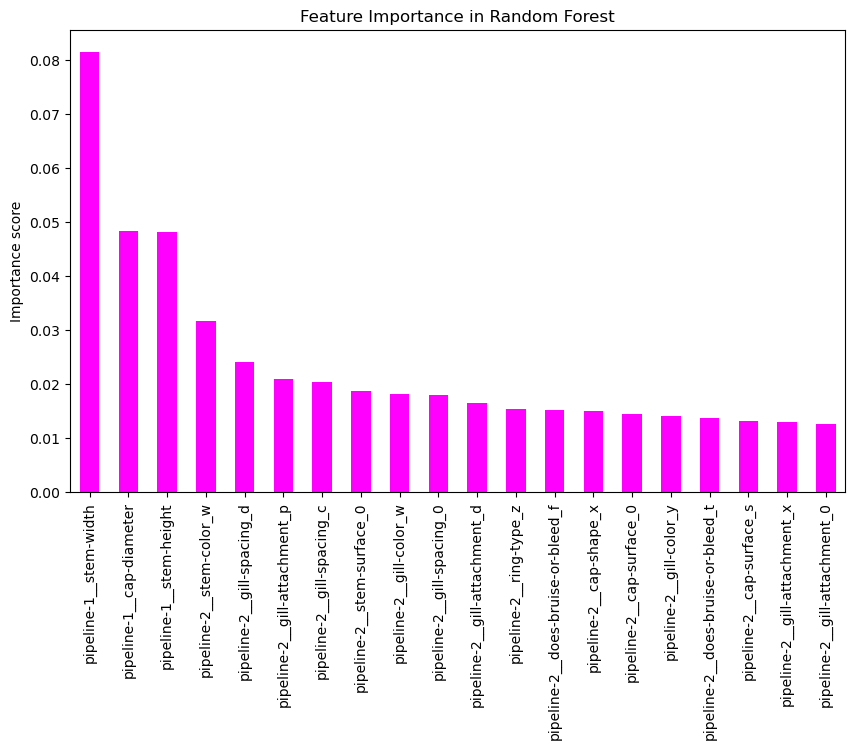

In [121]:
top_importances = importance_series.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_importances.plot(kind='bar', title='Feature Importance in Random Forest', color='magenta')
plt.ylabel('Importance score')
plt.show()

In [122]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=1, max_depth=None, random_state=42
    ))
])
rf_pipeline.fit(X_train, y_train)

predictions = rf_pipeline.predict(X_test)
proba = rf_pipeline.predict_proba(X_test)[:,1] # probability of class 1
accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, proba)
clf_report = classification_report(y_true=y_test, y_pred=predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Random Forest \n")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification report:\n{clf_report}")
conf_matrix

Random Forest 

Accuracy: 0.9979531684951695
ROC AUC: 0.9979738213132284
Classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      5469
           p       1.00      1.00      1.00      6745

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



array([[5459,   10],
       [  15, 6730]])

In [123]:
rf_scores = cross_validate(rf_pipeline, X_train, y_train, return_train_score=True)
pd.DataFrame(rf_scores)

,fit_time,score_time,test_score,train_score
0,0.152298,0.028505,0.997134,0.999002
1,0.178272,0.029699,0.997237,0.999181
2,0.152983,0.033665,0.995702,0.998849
3,0.189518,0.030050,0.995804,0.999104
4,0.158399,0.027788,0.997032,0.998772


In [67]:
# # Hyperparameter tuning
# #
# # Randomized parameter search
# param_dist = {
#     'classifier__n_estimators': [10, 15, 20, 30, 50, 100],
#     'classifier__max_depth': [None, 10, 20, 30, 50],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4]
# }

# random_search = RandomizedSearchCV(
#     rf_pipeline, param_distributions=param_dist,
#     n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=123
# )
# random_search.fit(X_train, y_train)


# # Best model
# best_rf_pipeline = random_search.best_estimator_
# print(f"Best parameters: {random_search.best_params_}")

Best parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 50}


OLD:
Best parameters (random search): {'classifier__n_estimators': 100, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': None}


In [124]:
# Tune the rf model
tuned_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)
    )]
)

tuned_rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   O...
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color',
                                                   'does-bruise-or-bleed',
                                                   'gill-attachment',
                                                   'gill-spacing', 'gill-color',
                                                   'stem-root', 'stem-surface',
                                                   'stem-color', 'veil-type',
                                                   'veil-color', 'has-ring',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'habitat', 'season'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        random_state=42))])

In [125]:
tuned_predictions = tuned_rf_pipeline.predict(X_test)
tuned_proba = tuned_rf_pipeline.predict_proba(X_test)[:,1] # probability of class 1
tuned_accuracy = accuracy_score(y_test, tuned_predictions)
roc_auc = roc_auc_score(y_test, tuned_proba)
clf_report = classification_report(y_true=y_test, y_pred=tuned_predictions)
conf_matrix = confusion_matrix(y_test, tuned_predictions)

print("Random Forest with Tuned Hyperparameters \n")
print(f"Accuracy: {tuned_accuracy:.4f}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification report:\n{clf_report}")
conf_matrix

Random Forest with Tuned Hyperparameters 

Accuracy: 0.9797
ROC AUC: 0.9980750590869949
Classification report:
              precision    recall  f1-score   support

           e       0.98      0.98      0.98      5469
           p       0.98      0.98      0.98      6745

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214



array([[5341,  128],
       [ 120, 6625]])

In [126]:
new_rf_scores = cross_validate(tuned_rf_pipeline, X_train, y_train, return_train_score=True)
pd.DataFrame(new_rf_scores)

,fit_time,score_time,test_score,train_score
0,1.603480,0.062847,0.982806,0.982781
1,1.523147,0.059868,0.981373,0.981885
2,1.557398,0.060276,0.979020,0.980606
3,1.650107,0.065317,0.981066,0.982474
4,1.556241,0.071215,0.978610,0.980196


Perfect performance on classifying a mushroom as poisonous or edible which could be a good thing. We can look at the top 10 features contributing to such a high performance.

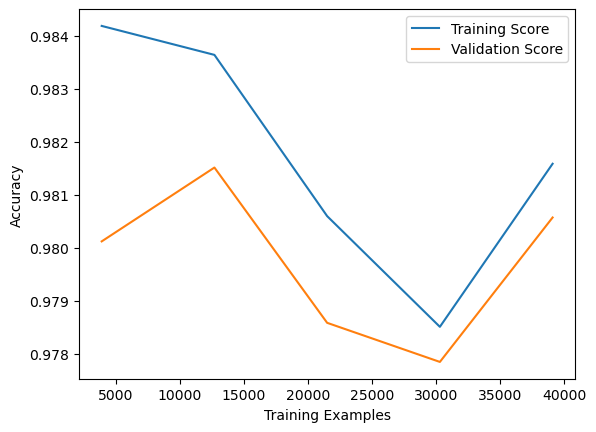

In [127]:
train_sizes, train_scores, test_scores = learning_curve(
    tuned_rf_pipeline, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Evaluation

In [128]:
# Compare models
models_comparison = {
    "Decision Tree (Baseline)": mean_std_cross_val_scores(tree_pipeline, X_train, y_train, return_train_score=True, scoring=scoring_metric),
    "New Decision Tree (New Baseline)": mean_std_cross_val_scores(new_tree_pipeline, X_train, y_train, return_train_score=True, scoring=scoring_metric),
    "Logistic Regression": mean_std_cross_val_scores(logreg_pipeline, X_train, y_train, return_train_score=True, scoring=scoring_metric),
    "Random Forest": mean_std_cross_val_scores(rf_pipeline, X_train, y_train, return_train_score=True, scoring=scoring_metric),
    "Random Forest (Tuned)": mean_std_cross_val_scores(tuned_rf_pipeline, X_train, y_train, return_train_score=True, scoring=scoring_metric)
}

pd.DataFrame(models_comparison).T


,fit_time,score_time,test_score,train_score
Decision Tree (Baseline),0.361 (+/- 0.006),0.028 (+/- 0.001),0.999 (+/- 0.000),1.000 (+/- 0.000)
New Decision Tree (New Baseline),0.235 (+/- 0.005),0.028 (+/- 0.001),0.729 (+/- 0.005),0.731 (+/- 0.003)
Logistic Regression,0.426 (+/- 0.025),0.028 (+/- 0.001),0.863 (+/- 0.003),0.864 (+/- 0.001)
Random Forest,0.148 (+/- 0.002),0.028 (+/- 0.000),0.997 (+/- 0.001),0.999 (+/- 0.000)
Random Forest (Tuned),1.620 (+/- 0.028),0.066 (+/- 0.011),0.981 (+/- 0.002),0.982 (+/- 0.001)


### Clustering analysis

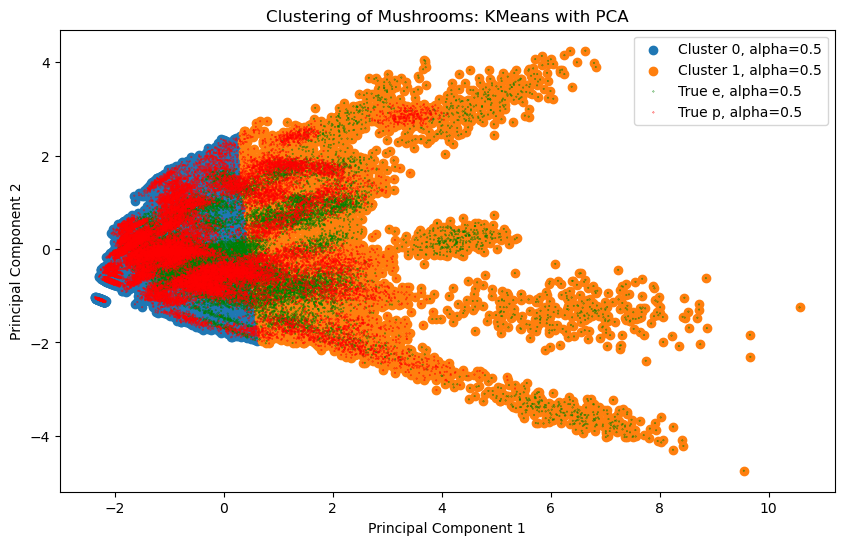

Cluster Prototypes (Edible/Poisonous):
   pipeline-1__cap-diameter  pipeline-1__stem-height  pipeline-1__stem-width  \
0                 -0.420209                -0.414717               -0.414087   
1                  0.988417                 0.975498                0.974016   

   pipeline-2__cap-shape_b  pipeline-2__cap-shape_c  pipeline-2__cap-shape_f  \
0                 0.115198                 0.036738                 0.223763   
1                 0.043288                 0.012597                 0.210249   

   pipeline-2__cap-shape_o  pipeline-2__cap-shape_p  pipeline-2__cap-shape_s  \
0                 0.062997                 0.018284                 0.124297   
1                 0.044765                 0.100399                 0.099627   

   pipeline-2__cap-shape_x  ...  pipeline-2__habitat_h  pipeline-2__habitat_l  \
0                 0.418722  ...               0.041880               0.057760   
1                 0.489075  ...               0.012028               0.03622

In [ ]:
# Reduce dimensionality for clustering analysis
pca = PCA(n_components=2, random_state=42)
X_train_reduced = pca.fit_transform(X_train_processed)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_reduced)

# Add clusters to the dataset
X_train_clustered = pd.DataFrame(X_train_reduced, columns=["PC1", "PC2"])
X_train_clustered["Cluster"] = clusters
X_train_clustered["Class"] = y_train.reset_index(drop=True)

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    cluster_data = X_train_clustered[X_train_clustered["Cluster"] == cluster]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f"Cluster {cluster}, alpha=0.5")

# Overlay the ground truth for edible and poisonous mushrooms
colors = {"e": "green", "p": "red"}
for cls, color in colors.items():
    cls_data = X_train_clustered[X_train_clustered["Class"] == cls]
    plt.scatter(cls_data["PC1"], cls_data["PC2"], edgecolor=color, facecolor="none", s=0.1, label=f"True {cls}, alpha=0.5")

plt.title("Clustering of Mushrooms: K-Means with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Determine cluster prototypes
cluster_centers = kmeans.cluster_centers_
prototypes = pd.DataFrame(pca.inverse_transform(cluster_centers), columns=feature_names)
print("Cluster Prototypes (Edible/Poisonous):")
print(prototypes)

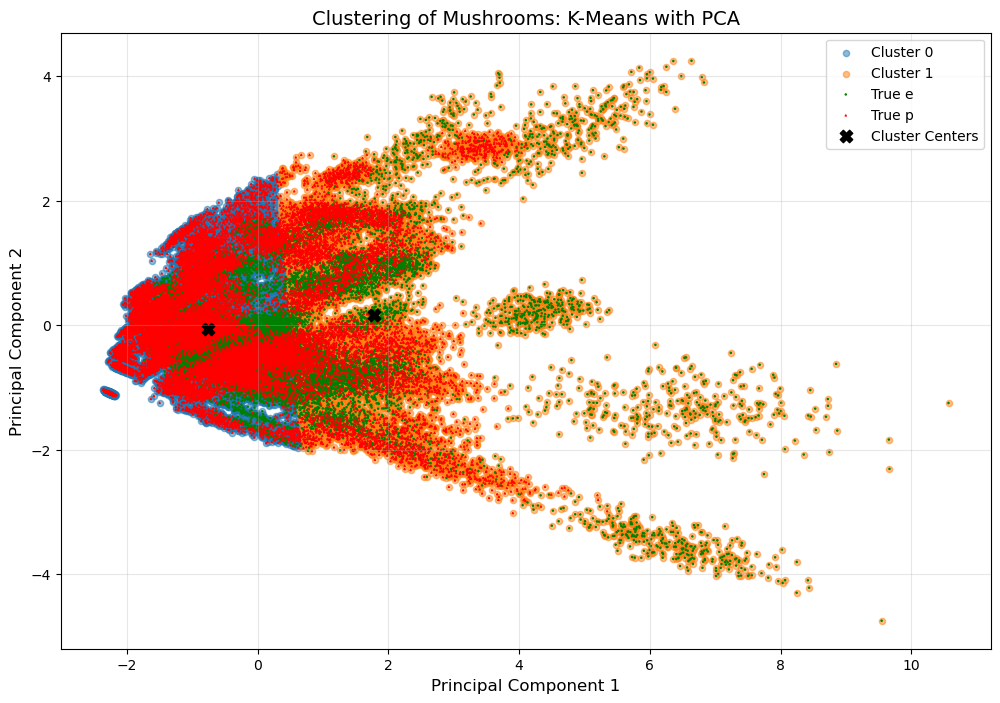

Cluster Prototypes (Edible/Poisonous):
   pipeline-1__cap-diameter  pipeline-1__stem-height  pipeline-1__stem-width  \
0                 -0.420209                -0.414717               -0.414087   
1                  0.988417                 0.975498                0.974016   

   pipeline-2__cap-shape_b  pipeline-2__cap-shape_c  pipeline-2__cap-shape_f  \
0                 0.115198                 0.036738                 0.223763   
1                 0.043288                 0.012597                 0.210249   

   pipeline-2__cap-shape_o  pipeline-2__cap-shape_p  pipeline-2__cap-shape_s  \
0                 0.062997                 0.018284                 0.124297   
1                 0.044765                 0.100399                 0.099627   

   pipeline-2__cap-shape_x  ...  pipeline-2__habitat_h  pipeline-2__habitat_l  \
0                 0.418722  ...               0.041880               0.057760   
1                 0.489075  ...               0.012028               0.03622

In [164]:
# Reduce dimensionality for clustering analysis
pca = PCA(n_components=2, random_state=42)
X_train_reduced = pca.fit_transform(X_train_processed)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_reduced)

# Add clusters to the dataset
X_train_clustered = pd.DataFrame(X_train_reduced, columns=["PC1", "PC2"])
X_train_clustered["Cluster"] = clusters
X_train_clustered["Class"] = y_train.reset_index(drop=True)

# Visualize clusters
plt.figure(figsize=(12, 8))

# Plot clusters with transparency
for cluster in np.unique(clusters):
    cluster_data = X_train_clustered[X_train_clustered["Cluster"] == cluster]
    plt.scatter(
        cluster_data["PC1"], 
        cluster_data["PC2"], 
        label=f"Cluster {cluster}", 
        alpha=0.5, 
        s=20  # Adjust size for better visibility
    )

# Overlay the ground truth (true labels) with different marker styles
colors = {"e": "green", "p": "red"}
for cls, color in colors.items():
    cls_data = X_train_clustered[X_train_clustered["Class"] == cls]
    plt.scatter(
        cls_data["PC1"], 
        cls_data["PC2"], 
        edgecolor=color, 
        facecolor="none", 
        linewidth=0.8,  # Thicker edge for true labels
        marker="o" if cls == "e" else "^",  # Different markers for edible/poisonous
        s=1,  # Smaller size for true labels
        label=f"True {cls}"
    )

# Add cluster centers for better interpretability
cluster_centers = kmeans.cluster_centers_
plt.scatter(
    cluster_centers[:, 0], 
    cluster_centers[:, 1], 
    c="black", 
    marker="X", 
    s=80, linewidths=1, edgecolors="black",
    label="Cluster Centers"
)

# Add labels, title, and legend
plt.title("Clustering of Mushrooms: K-Means with PCA", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(fontsize=10, loc="upper right")
plt.grid(alpha=0.3)
plt.show()

# Determine cluster prototypes
prototypes = pd.DataFrame(pca.inverse_transform(cluster_centers), columns=feature_names)
print("Cluster Prototypes (Edible/Poisonous):")
print(prototypes)


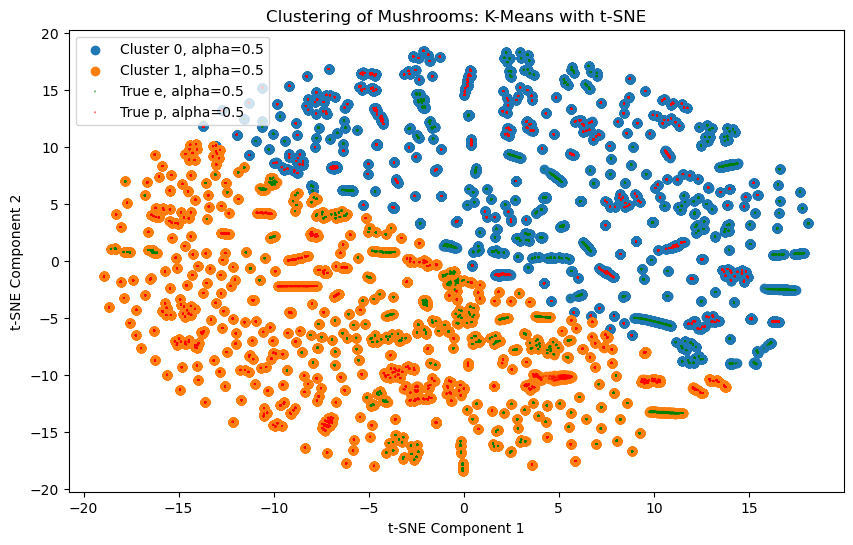

AttributeError: 'TSNE' object has no attribute 'inverse_transform'

In [172]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300, n_iter_without_progress=300)
X_train_tsne = tsne.fit_transform(X_train_processed)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_tsne)

# Add clusters to the dataset
X_train_clustered = pd.DataFrame(X_train_tsne, columns=["tSNE1", "tSNE2"])
X_train_clustered["Cluster"] = clusters
X_train_clustered["Class"] = y_train.reset_index(drop=True)

# Visualize clusters with t-SNE
plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    cluster_data = X_train_clustered[X_train_clustered["Cluster"] == cluster]
    plt.scatter(cluster_data["tSNE1"], cluster_data["tSNE2"], label=f"Cluster {cluster}, alpha=0.5")

# Overlay the ground truth for edible and poisonous mushrooms
colors = {"e": "green", "p": "red"}
for cls, color in colors.items():
    cls_data = X_train_clustered[X_train_clustered["Class"] == cls]
    plt.scatter(cls_data["tSNE1"], cls_data["tSNE2"], edgecolor=color, facecolor="none", s=0.1, label=f"True {cls}, alpha=0.5")

# Display the plot
plt.title("Clustering of Mushrooms: K-Means with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()

# Determine cluster prototypes
cluster_centers = kmeans.cluster_centers_
prototypes = pd.DataFrame(tsne.inverse_transform(cluster_centers), columns=feature_names)
print("Cluster Prototypes (Edible/Poisonous):")
print(prototypes)


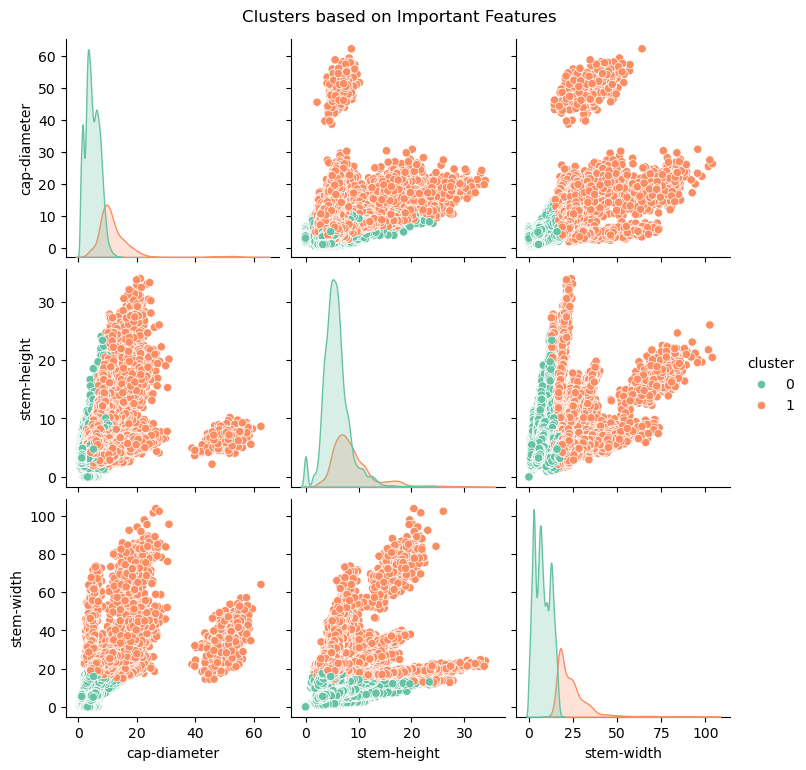

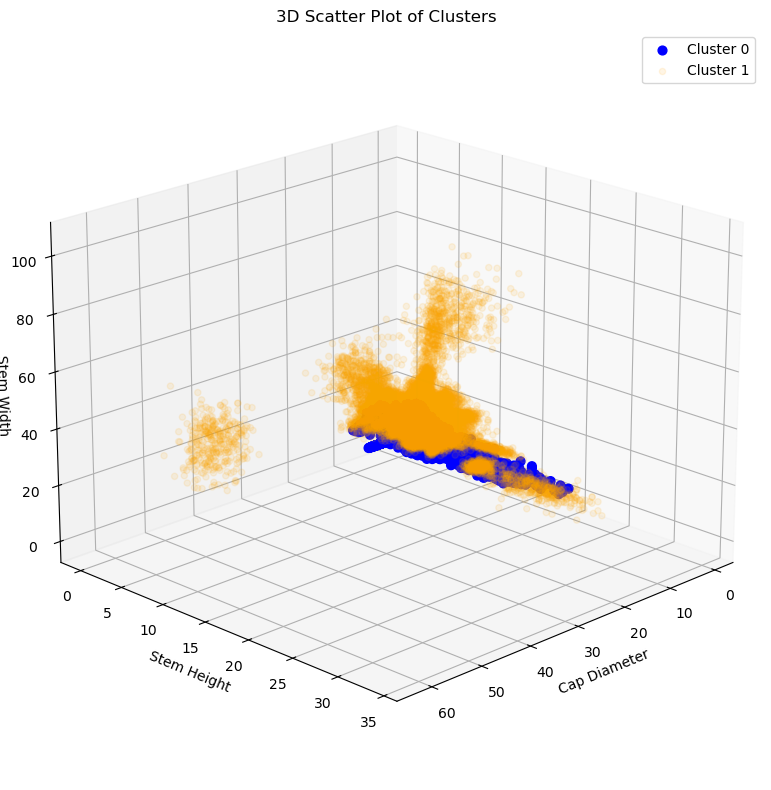

In [140]:
important_features = ['cap-diameter', 'stem-height', 'stem-width']

# Add cluster labels to the original dataset
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(df[important_features])
df['cluster'] = kmeans.labels_

# Pairplot for key features
sns.pairplot(df, vars=important_features, hue='cluster', palette='Set2')
plt.suptitle("Clusters based on Important Features", y=1.02)
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters with different settings
for cluster in range(kmeans.n_clusters):
    subset = df[df['cluster'] == cluster]
    
    # Customize plot settings for each cluster
    if cluster == 1:  # Orange cluster
        ax.scatter(
            subset[important_features[0]],
            subset[important_features[1]],
            subset[important_features[2]],
            label=f"Cluster {cluster}",
            s=20,  # Reduce point size
            alpha=0.1,  # Increase transparency
            c='orange',  # Force orange color
        )
    else:  # Blue cluster
        ax.scatter(
            subset[important_features[0]],
            subset[important_features[1]],
            subset[important_features[2]],
            label=f"Cluster {cluster}",
            s=40,  # Larger point size
            alpha=1.0,  # Fully opaque
            c='blue',  # Force blue color
        )

ax.set_xlabel("Cap Diameter")
ax.set_ylabel("Stem Height")
ax.set_zlabel("Stem Width", labelpad=1)  # Increase label padding


# Set a different viewing angle
ax.view_init(elev=20, azim=45)  # Adjust elevation and azimuth for better view

ax.legend()
plt.title("3D Scatter Plot of Clusters")
plt.tight_layout()
plt.show()


In [131]:
# Get the count of each class (edible 'e' and poisonous 'p') per cluster
cluster_class_distribution = df.groupby(['cluster', 'class']).size().unstack(fill_value=0)

# Print the distribution of classes within each cluster
print(cluster_class_distribution)

# Check which cluster has more 'p' (poisonous) or 'e' (edible)
cluster_class_distribution.idxmax(axis=1)  # This will return the class label (p or e) with the highest count per cluster


class        e      p
cluster              
0        17675  27076
1         9506   6812


cluster
0    p
1    e
dtype: object